In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")
results = pd.read_csv("results.csv", encoding = 'unicode_escape')

print(data.columns)
print(results.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [2]:
TeamName = ['Liverpool', 'Manchester United', 'Arsenal', 'Manchester City', 'Leicester City', 'Chelsea', 
            'Tottenham Hotspur', 'Everton', 'West Ham United', 'Crystal Palace', 'Wolverhampton Wanderers', 
            'Bournemouth', 'Burnley', 'Watford', 'Newcastle United', 'Aston Villa', 'Brighton & Hove Albion', 
            'Norwich City', 'Southampton', 'Sheffield United', 'Fulham', 'Huddersfield Town', 'Cardiff City', 
            'West Bromwich Albion', 'Leeds United']

dataEPL = data[data['Club'].isin(TeamName)].reset_index()
dataEPL

,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
2,5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
3,13,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
4,14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,17677,17677,246454,D. Revan,17,https://cdn.sofifa.org/players/4/19/246454.png,England,https://cdn.sofifa.org/flags/14.png,53,72,...,39.0,49.0,56.0,56.0,8.0,14.0,8.0,7.0,14.0,€278K
795,17708,17708,240603,J. Doyle-Hayes,19,https://cdn.sofifa.org/players/4/19/240603.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,53,72,...,43.0,44.0,46.0,48.0,8.0,10.0,6.0,10.0,7.0,€328K
796,17795,17795,245611,D. Parkhouse,18,https://cdn.sofifa.org/players/4/19/245611.png,Northern Ireland,https://cdn.sofifa.org/flags/35.png,52,71,...,46.0,21.0,20.0,22.0,11.0,12.0,11.0,6.0,12.0,€253K
797,17796,17796,242541,C. Brown,20,https://cdn.sofifa.org/players/4/19/242541.png,England,https://cdn.sofifa.org/flags/14.png,52,64,...,40.0,47.0,50.0,51.0,12.0,8.0,14.0,15.0,13.0,€176K


In [3]:
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') | (df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM' )):
        return 'DF'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM')):
        return 'MF'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'ST'
    else:
        return df.Position
    
dataEPL['Simple_Position'] = dataEPL.apply(simple_position,axis = 1)
print(dataEPL['Simple_Position'].unique())
dataEPL

['GK' 'MF' 'ST' 'DF' nan]


,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple_Position
0,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,GK
1,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,MF
2,5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,ST
3,13,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M,MF
4,14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,...,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,17677,17677,246454,D. Revan,17,https://cdn.sofifa.org/players/4/19/246454.png,England,https://cdn.sofifa.org/flags/14.png,53,72,...,49.0,56.0,56.0,8.0,14.0,8.0,7.0,14.0,€278K,DF
795,17708,17708,240603,J. Doyle-Hayes,19,https://cdn.sofifa.org/players/4/19/240603.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,53,72,...,44.0,46.0,48.0,8.0,10.0,6.0,10.0,7.0,€328K,MF
796,17795,17795,245611,D. Parkhouse,18,https://cdn.sofifa.org/players/4/19/245611.png,Northern Ireland,https://cdn.sofifa.org/flags/35.png,52,71,...,21.0,20.0,22.0,11.0,12.0,11.0,6.0,12.0,€253K,ST
797,17796,17796,242541,C. Brown,20,https://cdn.sofifa.org/players/4/19/242541.png,England,https://cdn.sofifa.org/flags/14.png,52,64,...,47.0,50.0,51.0,12.0,8.0,14.0,15.0,13.0,€176K,DF


In [4]:
dataEPLGK = dataEPL[dataEPL['Position']=='GK']
dataEPLGK.sort_values(["Club", 'Overall'], axis = 0, ascending = [True, False], inplace = True, ignore_index=True)

team_name = 'someteam'
for i in range(len(dataEPLGK)):
    if dataEPLGK['Club'][i] != team_name:
        team_name = dataEPLGK['Club'][i]
    else:
        dataEPLGK.drop(i, inplace = True)

dataEPLGK.reset_index(drop=True, inplace=True)
dataEPLGK

<ipython-input-4-d26266d425b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEPLGK.sort_values(["Club", 'Overall'], axis = 0, ascending = [True, False], inplace = True, ignore_index=True)
E:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple_Position
0,131,131,192563,B. Leno,26,https://cdn.sofifa.org/players/4/19/192563.png,Germany,https://cdn.sofifa.org/flags/21.png,84,87,...,27.0,15.0,18.0,84.0,82.0,75.0,85.0,82.0,€53.3M,GK
1,3470,3470,185427,O. Nyland,27,https://cdn.sofifa.org/players/4/19/185427.png,Norway,https://cdn.sofifa.org/flags/36.png,72,74,...,17.0,11.0,12.0,73.0,67.0,77.0,73.0,74.0,€5M,GK
2,704,704,172723,A. Begović,31,https://cdn.sofifa.org/players/4/19/172723.png,Bosnia Herzegovina,https://cdn.sofifa.org/flags/8.png,79,79,...,18.0,11.0,12.0,80.0,80.0,72.0,77.0,79.0,€14.3M,GK
3,647,647,199005,M. Ryan,26,https://cdn.sofifa.org/players/4/19/199005.png,Australia,https://cdn.sofifa.org/flags/195.png,79,81,...,10.0,20.0,17.0,81.0,74.0,82.0,78.0,83.0,€20.7M,GK
4,463,463,203841,N. Pope,26,https://cdn.sofifa.org/players/4/19/203841.png,England,https://cdn.sofifa.org/flags/14.png,80,83,...,14.0,15.0,14.0,79.0,80.0,74.0,80.0,80.0,€25.7M,GK
5,2876,2876,184436,A. Smithies,28,https://cdn.sofifa.org/players/4/19/184436.png,England,https://cdn.sofifa.org/flags/14.png,73,75,...,15.0,12.0,17.0,76.0,69.0,67.0,74.0,74.0,€6.9M,GK
6,177,177,206585,Kepa,23,https://cdn.sofifa.org/players/4/19/206585.png,Spain,https://cdn.sofifa.org/flags/45.png,83,91,...,19.0,18.0,16.0,84.0,80.0,76.0,80.0,84.0,€58.4M,GK
7,500,500,189690,Guaita,31,https://cdn.sofifa.org/players/4/19/189690.png,Spain,https://cdn.sofifa.org/flags/45.png,80,80,...,23.0,15.0,17.0,82.0,81.0,79.0,77.0,82.0,€17.1M,GK
8,180,180,204935,J. Pickford,24,https://cdn.sofifa.org/players/4/19/204935.png,England,https://cdn.sofifa.org/flags/14.png,83,88,...,16.0,20.0,12.0,83.0,78.0,88.0,81.0,86.0,€49.4M,GK
9,609,609,206652,Sergio Rico,24,https://cdn.sofifa.org/players/4/19/206652.png,Spain,https://cdn.sofifa.org/flags/45.png,79,83,...,16.0,11.0,11.0,77.0,78.0,77.0,79.0,81.0,NaN,GK


In [5]:
dataEPLnoGK = dataEPL.drop(dataEPL[dataEPL['Position']=='GK'].index)
dataEPLnoGK.sort_values(["Club", 'Overall'], axis = 0, ascending = [True, False], inplace = True, ignore_index=True)

team_name = 'Arsenal'
countDF = 0
countMF = 0
countST = 0

for i in range(len(dataEPLnoGK)):
    if dataEPLnoGK['Club'][i] == team_name: 
        if dataEPLnoGK['Simple_Position'][i] == 'DF':
            countDF += 1
            if countDF > 5:
                dataEPLnoGK.drop(i, inplace = True)
        elif dataEPLnoGK['Simple_Position'][i] == 'MF':
            countMF += 1
            if countMF > 4:
                dataEPLnoGK.drop(i, inplace = True)
        elif dataEPLnoGK['Simple_Position'][i] == 'ST':
            countST += 1
            if countST > 3:
                dataEPLnoGK.drop(i, inplace = True)
        else:
            dataEPLnoGK.drop(i, inplace = True)
    else:
        team_name = dataEPLnoGK['Club'][i]
        if dataEPLnoGK['Simple_Position'][i] == 'DF':
            countDF = 1
            countMF = 0
            countST = 0
        elif dataEPLnoGK['Simple_Position'][i] == 'MF':
            countDF = 0
            countMF = 1
            countST = 0
        else:
            countDF = 0
            countMF = 0
            countST = 1

dataEPLnoGK.reset_index(drop=True, inplace=True)
dataEPLnoGK

,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple_Position
0,33,33,188567,P. Aubameyang,29,https://cdn.sofifa.org/players/4/19/188567.png,Gabon,https://cdn.sofifa.org/flags/115.png,88,88,...,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,€112.1M,MF
1,74,74,176635,M. Özil,29,https://cdn.sofifa.org/players/4/19/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,...,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,€82.7M,MF
2,87,87,193301,A. Lacazette,27,https://cdn.sofifa.org/players/4/19/193301.png,France,https://cdn.sofifa.org/flags/18.png,85,86,...,29.0,42.0,30.0,11.0,6.0,9.0,5.0,6.0,€88.9M,ST
3,146,146,172879,Sokratis,30,https://cdn.sofifa.org/players/4/19/172879.png,Greece,https://cdn.sofifa.org/flags/22.png,84,84,...,85.0,87.0,85.0,6.0,8.0,5.0,12.0,5.0,€43.7M,DF
4,199,199,192883,H. Mkhitaryan,29,https://cdn.sofifa.org/players/4/19/192883.png,Armenia,https://cdn.sofifa.org/flags/3.png,83,83,...,41.0,53.0,55.0,5.0,11.0,14.0,5.0,7.0,€48.5M,MF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1658,1658,212267,Ivan Cavaleiro,24,https://cdn.sofifa.org/players/4/19/212267.png,Portugal,https://cdn.sofifa.org/flags/38.png,75,78,...,25.0,46.0,36.0,13.0,15.0,12.0,9.0,13.0,€16.8M,ST
296,1974,1974,201417,M. Doherty,26,https://cdn.sofifa.org/players/4/19/201417.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,75,78,...,69.0,71.0,72.0,15.0,8.0,12.0,11.0,9.0,€13.8M,DF
297,2189,2189,202048,C. Coady,25,https://cdn.sofifa.org/players/4/19/202048.png,England,https://cdn.sofifa.org/flags/14.png,74,77,...,75.0,74.0,73.0,8.0,15.0,10.0,12.0,8.0,€11.9M,DF
298,2429,2429,208295,R. Saïss,28,https://cdn.sofifa.org/players/4/19/208295.png,Morocco,https://cdn.sofifa.org/flags/129.png,74,74,...,76.0,75.0,72.0,10.0,16.0,6.0,11.0,7.0,€10.5M,MF


In [6]:
GK = dataEPLGK[['Club', 'Age', 'Overall', 'Potential', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
GK.rename(columns={'Age':'GKAge', 'Overall': 'GKOverall', 'Potential': 'GKPotential'}, inplace=True)
GK['Club'].replace({'Brighton & Hove Albion':'Brighton', 'Leicester City':'Leicester', 'Manchester City':'Man City',
                         'Manchester United':'Man United', 'Newcastle United':'Newcastle', 'Norwich City':'Norwich',
                        'Tottenham Hotspur':'Tottenham', 'West Ham United':'West Ham', 'Wolverhampton Wanderers':'Wolves',
                        'Huddersfield Town':'Huddersfield', 'Cardiff City':'Cardiff', 'West Bromwich Albion':'West Brom', 
                        'Leeds United':'Leeds'}, inplace=True)


notGK = dataEPLnoGK[['Club', 'Simple_Position', 'Age', 'Overall', 'Potential', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']]

TeamAgg = notGK.groupby(['Club', 'Simple_Position']).mean().round(2).reset_index()
TeamAgg['Club'].replace({'Brighton & Hove Albion':'Brighton', 'Leicester City':'Leicester', 'Manchester City':'Man City',
                         'Manchester United':'Man United', 'Newcastle United':'Newcastle', 'Norwich City':'Norwich',
                        'Tottenham Hotspur':'Tottenham', 'West Ham United':'West Ham', 'Wolverhampton Wanderers':'Wolves',
                        'Huddersfield Town':'Huddersfield', 'Cardiff City':'Cardiff', 'West Bromwich Albion':'West Brom', 
                        'Leeds United':'Leeds'}, inplace=True)

GK

E:\anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
E:\anaconda\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Club,GKAge,GKOverall,GKPotential,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,Arsenal,26,84,87,84.0,82.0,75.0,85.0,82.0
1,Aston Villa,27,72,74,73.0,67.0,77.0,73.0,74.0
2,Bournemouth,31,79,79,80.0,80.0,72.0,77.0,79.0
3,Brighton,26,79,81,81.0,74.0,82.0,78.0,83.0
4,Burnley,26,80,83,79.0,80.0,74.0,80.0,80.0
5,Cardiff,28,73,75,76.0,69.0,67.0,74.0,74.0
6,Chelsea,23,83,91,84.0,80.0,76.0,80.0,84.0
7,Crystal Palace,31,80,80,82.0,81.0,79.0,77.0,82.0
8,Everton,24,83,88,83.0,78.0,88.0,81.0,86.0
9,Fulham,24,79,83,77.0,78.0,77.0,79.0,81.0


In [7]:
TeamAggDF = TeamAgg[TeamAgg['Simple_Position']=='DF'].reset_index()
TeamAggMF = TeamAgg[TeamAgg['Simple_Position']=='MF'].reset_index()
TeamAggST = TeamAgg[TeamAgg['Simple_Position']=='ST'].reset_index()

TeamAggDF.drop(['index', 'Simple_Position'], axis=1, inplace=True)
TeamAggMF.drop(['index', 'Simple_Position'], axis=1, inplace=True)
TeamAggST.drop(['index', 'Simple_Position'], axis=1, inplace=True)

TeamAggST

,Club,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,Arsenal,23.67,75.33,82.67,64.33,74.67,62.33,71.33,70.67,76.67,...,68.00,61.33,32.67,74.33,68.67,72.67,73.67,37.67,36.67,31.33
1,Aston Villa,24.67,72.67,77.33,48.00,73.33,71.33,61.33,58.67,72.00,...,56.67,50.33,25.00,74.33,57.67,69.33,70.67,25.00,26.00,19.00
2,Bournemouth,27.67,75.33,77.67,51.33,79.00,68.33,64.67,68.00,73.67,...,71.33,57.33,27.00,77.33,63.67,74.67,73.33,26.00,26.33,17.67
3,Brighton,27.67,76.33,79.00,59.00,77.67,76.00,69.33,71.67,69.67,...,69.33,79.67,44.33,81.00,68.33,74.33,80.67,39.67,38.33,30.67
4,Burnley,27.33,76.33,76.67,57.00,77.33,81.67,67.67,70.33,68.33,...,69.67,80.33,41.00,78.67,68.00,79.00,76.67,41.33,38.00,32.33
5,Cardiff,25.00,72.00,75.67,57.00,70.00,62.00,63.67,62.67,72.67,...,66.00,52.33,46.33,71.67,61.33,63.00,64.33,30.33,35.33,29.67
6,Chelsea,27.00,85.67,86.67,76.67,80.33,59.33,82.33,73.00,88.67,...,77.67,51.33,40.00,84.00,82.67,75.33,82.00,38.00,32.67,31.00
7,Crystal Palace,26.00,78.00,79.00,69.67,75.67,70.00,70.67,66.33,77.33,...,70.33,68.00,30.67,75.00,71.33,70.33,73.33,28.67,35.33,27.00
8,Everton,25.33,77.67,80.33,63.00,78.33,77.00,70.33,70.67,78.00,...,70.00,73.67,33.67,78.67,64.67,72.67,73.67,32.67,33.67,25.00
9,Fulham,23.33,74.67,79.33,45.33,73.00,73.33,68.33,70.67,70.33,...,68.00,76.67,20.67,79.33,66.33,68.33,68.00,36.33,29.00,22.00


In [8]:
results2019 = results[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']][results["Season"].isin(['2018-19', "2019-20"])].reset_index()
results2019['is_home_won'] = results2019['FTR']=='H'
results2019['is_home_won'] = results2019['is_home_won'].astype(int)
results2019['is_draw'] = results2019['FTR']=='D'
results2019['is_draw'] = results2019['is_draw'].astype(int)
results2019['is_away_won'] = results2019['FTR']=='A'
results2019['is_away_won'] = results2019['is_away_won'].astype(int)
results2019['home-away'] = results2019['FTHG'] - results2019['FTAG']

MatchAgg = results2019[['HomeTeam', 'AwayTeam', 'is_home_won', 'is_draw', 'is_away_won']]

y = MatchAgg['is_home_won']
y2 =  MatchAgg[["is_home_won", "is_draw", "is_away_won"]]
yreg = results2019['home-away']

MatchAgg

,HomeTeam,AwayTeam,is_home_won,is_draw,is_away_won
0,Man United,Leicester,1,0,0
1,Bournemouth,Cardiff,1,0,0
2,Fulham,Crystal Palace,0,0,1
3,Huddersfield,Chelsea,0,0,1
4,Newcastle,Tottenham,0,0,1
...,...,...,...,...,...
755,Leicester,Man United,0,0,1
756,Man City,Norwich,1,0,0
757,Newcastle,Liverpool,0,0,1
758,Southampton,Sheffield United,1,0,0


In [9]:
d = {}
ColumnsName = GK.columns.tolist()

for i in ColumnsName:
    d[i] = []

hgk = pd.DataFrame(d)
agk = pd.DataFrame(d)
    
for i in range(len(MatchAgg)):
    for j in range(len(GK)):
        if MatchAgg['HomeTeam'][i] == GK['Club'][j]:
            hgk = hgk.append(GK.iloc[j], ignore_index=True)
        if MatchAgg['AwayTeam'][i] == GK['Club'][j]:
            agk = agk.append(GK.iloc[j], ignore_index=True)
            
hgk.columns = ['H'+ i for i in ColumnsName]
agk.columns = ['A'+ i for i in ColumnsName]
#df['is_home_won'] = MatchAgg['is_home_won']
hgk.drop(columns = ['HClub'], inplace=True)
agk.drop(columns = ['AClub'], inplace=True)

Xgk = pd.concat([hgk, agk], axis=1)
Xgk

,HGKAge,HGKOverall,HGKPotential,HGKDiving,HGKHandling,HGKKicking,HGKPositioning,HGKReflexes,AGKAge,AGKOverall,AGKPotential,AGKDiving,AGKHandling,AGKKicking,AGKPositioning,AGKReflexes
0,27.0,91.0,93.0,90.0,85.0,87.0,88.0,94.0,31.0,84.0,84.0,82.0,77.0,82.0,80.0,88.0
1,31.0,79.0,79.0,80.0,80.0,72.0,77.0,79.0,28.0,73.0,75.0,76.0,69.0,67.0,74.0,74.0
2,24.0,79.0,83.0,77.0,78.0,77.0,79.0,81.0,31.0,80.0,80.0,82.0,81.0,79.0,77.0,82.0
3,29.0,76.0,76.0,74.0,77.0,67.0,74.0,77.0,23.0,83.0,91.0,84.0,80.0,76.0,80.0,84.0
4,29.0,78.0,80.0,75.0,80.0,81.0,76.0,80.0,31.0,88.0,88.0,88.0,84.0,68.0,83.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,31.0,84.0,84.0,82.0,77.0,82.0,80.0,88.0,27.0,91.0,93.0,90.0,85.0,87.0,88.0,94.0
756,24.0,86.0,90.0,85.0,80.0,91.0,82.0,87.0,30.0,73.0,73.0,74.0,72.0,68.0,68.0,74.0
757,29.0,78.0,80.0,75.0,80.0,81.0,76.0,80.0,25.0,85.0,90.0,83.0,81.0,85.0,84.0,88.0
758,28.0,77.0,78.0,78.0,76.0,64.0,77.0,81.0,21.0,72.0,83.0,73.0,70.0,68.0,68.0,74.0


In [10]:
d = {}
ColumnsName = TeamAggDF.columns.tolist()

for i in ColumnsName:
    d[i] = []

hdf = pd.DataFrame(d)
adf = pd.DataFrame(d)
    
for i in range(len(MatchAgg)):
    for j in range(len(TeamAggDF)):
        if MatchAgg['HomeTeam'][i] == TeamAggDF['Club'][j]:
            hdf = hdf.append(TeamAggDF.iloc[j], ignore_index=True)
        if MatchAgg['AwayTeam'][i] == TeamAggDF['Club'][j]:
            adf = adf.append(TeamAggDF.iloc[j], ignore_index=True)
            
hdf.columns = ['HDF'+ i for i in ColumnsName]
adf.columns = ['ADF'+ i for i in ColumnsName]
#df['is_home_won'] = MatchAgg['is_home_won']
hdf.drop(columns = ['HDFClub'], inplace=True)
adf.drop(columns = ['ADFClub'], inplace=True)

Xdf = pd.concat([hdf, adf], axis=1)
Xdf

,HDFAge,HDFOverall,HDFPotential,HDFCrossing,HDFFinishing,HDFHeadingAccuracy,HDFShortPassing,HDFVolleys,HDFDribbling,HDFCurve,...,ADFLongShots,ADFAggression,ADFInterceptions,ADFPositioning,ADFVision,ADFPenalties,ADFComposure,ADFMarking,ADFStandingTackle,ADFSlidingTackle
0,25.6,82.6,85.8,67.2,54.2,75.6,76.2,60.6,73.6,62.8,...,56.8,77.4,78.6,70.6,69.0,56.8,75.6,78.8,80.6,78.4
1,26.6,76.8,78.6,66.0,42.4,71.8,74.2,46.8,67.4,59.4,...,28.8,79.6,74.6,37.0,46.8,40.2,64.8,71.6,74.0,73.6
2,24.4,75.8,81.0,57.4,54.8,66.4,74.8,47.4,65.6,56.2,...,41.2,77.0,75.4,45.4,52.4,43.4,72.2,75.8,78.0,76.8
3,25.8,76.4,79.8,62.8,36.6,70.0,69.6,38.8,57.8,48.4,...,64.0,84.0,85.0,59.8,69.6,59.8,77.6,83.6,86.2,82.8
4,26.4,76.8,79.4,45.6,36.4,75.0,67.8,42.2,55.2,49.0,...,59.4,79.4,83.2,59.6,67.8,57.6,77.2,83.8,85.6,84.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,24.2,80.0,83.8,60.8,53.2,74.0,77.4,54.2,74.6,61.4,...,57.8,80.8,78.2,63.6,66.4,59.2,76.2,77.4,79.6,76.8
756,29.4,84.8,85.6,64.0,52.8,78.2,77.4,54.8,65.8,63.6,...,55.0,75.8,71.6,48.6,59.8,45.8,69.6,70.2,71.4,65.2
757,26.4,76.8,79.4,45.6,36.4,75.0,67.8,42.2,55.2,49.0,...,54.2,81.2,82.8,49.8,67.2,60.4,77.0,81.6,84.6,81.8
758,25.8,78.0,79.6,55.0,39.2,73.0,73.2,45.8,62.6,52.2,...,47.8,72.6,72.0,47.2,51.4,45.8,61.2,71.4,71.8,70.2


In [11]:
d = {}
ColumnsName = TeamAggMF.columns.tolist()

for i in ColumnsName:
    d[i] = []

hmf = pd.DataFrame(d)
amf = pd.DataFrame(d)
    
for i in range(len(MatchAgg)):
    for j in range(len(TeamAggMF)):
        if MatchAgg['HomeTeam'][i] == TeamAggMF['Club'][j]:
            hmf = hmf.append(TeamAggMF.iloc[j], ignore_index=True)
        if MatchAgg['AwayTeam'][i] == TeamAggMF['Club'][j]:
            amf = amf.append(TeamAggMF.iloc[j], ignore_index=True)
            
hmf.columns = ['HMF'+ i for i in ColumnsName]
amf.columns = ['AMF'+ i for i in ColumnsName]

#df['is_home_won'] = MatchAgg['is_home_won']
hmf.drop(columns = ['HMFClub'], inplace=True)
amf.drop(columns = ['AMFClub'], inplace=True)

Xmf = pd.concat([hmf, amf], axis=1)
Xmf

,HMFAge,HMFOverall,HMFPotential,HMFCrossing,HMFFinishing,HMFHeadingAccuracy,HMFShortPassing,HMFVolleys,HMFDribbling,HMFCurve,...,AMFLongShots,AMFAggression,AMFInterceptions,AMFPositioning,AMFVision,AMFPenalties,AMFComposure,AMFMarking,AMFStandingTackle,AMFSlidingTackle
0,27.00,82.00,82.75,74.50,75.25,58.25,82.75,69.00,80.25,78.50,...,72.50,62.25,51.50,70.50,76.75,69.25,71.75,49.00,50.00,43.75
1,24.00,77.00,81.00,69.75,63.50,47.00,76.00,51.75,75.75,69.00,...,71.00,74.75,64.25,69.25,73.75,66.25,68.75,55.50,64.75,58.00
2,23.50,75.00,80.50,68.75,66.00,61.00,74.00,62.50,74.50,66.25,...,64.00,85.00,75.25,71.25,72.00,65.75,75.75,73.25,72.75,69.75
3,23.25,73.75,79.00,62.00,62.00,67.25,74.50,59.50,73.25,58.50,...,70.75,67.50,67.25,72.75,85.75,76.25,81.75,66.75,71.25,64.75
4,26.25,76.75,79.25,75.75,68.25,60.50,78.75,61.00,77.00,74.00,...,83.25,65.50,54.75,83.50,82.50,71.50,84.00,52.00,51.00,42.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,25.00,77.00,80.75,76.50,67.75,41.00,74.00,67.25,79.00,77.50,...,74.25,70.50,64.50,79.00,80.25,72.50,84.25,65.25,59.75,52.75
756,26.00,84.50,88.50,78.75,73.00,51.50,87.25,70.50,83.25,79.00,...,67.75,60.25,47.75,66.75,71.00,57.25,66.25,53.75,54.75,41.25
757,26.25,76.75,79.25,75.75,68.25,60.50,78.75,61.00,77.00,74.00,...,76.50,71.75,55.75,84.50,82.50,65.50,84.25,52.00,52.75,45.50
758,23.00,77.50,82.75,75.50,61.50,63.00,81.75,63.25,77.25,75.50,...,66.50,70.00,60.75,61.00,71.25,56.75,71.25,60.00,60.00,55.00


In [12]:
d = {}
ColumnsName = TeamAggST.columns.tolist()

for i in ColumnsName:
    d[i] = []

hst = pd.DataFrame(d)
ast = pd.DataFrame(d)
    
for i in range(len(MatchAgg)):
    for j in range(len(TeamAggST)):
        if MatchAgg['HomeTeam'][i] == TeamAggST['Club'][j]:
            hst = hst.append(TeamAggST.iloc[j], ignore_index=True)
        if MatchAgg['AwayTeam'][i] == TeamAggST['Club'][j]:
            ast = ast.append(TeamAggST.iloc[j], ignore_index=True)
            
hst.columns = ['HST'+ i for i in ColumnsName]
ast.columns = ['AST'+ i for i in ColumnsName]

#df['is_home_won'] = MatchAgg['is_home_won']
hst.drop(columns = ['HSTClub'], inplace=True)
ast.drop(columns = ['ASTClub'], inplace=True)

Xst = pd.concat([hst, ast], axis=1)
Xst

,HSTAge,HSTOverall,HSTPotential,HSTCrossing,HSTFinishing,HSTHeadingAccuracy,HSTShortPassing,HSTVolleys,HSTDribbling,HSTCurve,...,ASTLongShots,ASTAggression,ASTInterceptions,ASTPositioning,ASTVision,ASTPenalties,ASTComposure,ASTMarking,ASTStandingTackle,ASTSlidingTackle
0,25.33,85.33,88.00,77.00,83.67,76.00,77.00,78.67,84.67,79.00,...,68.33,77.00,39.33,82.33,68.67,76.00,74.00,46.00,45.00,36.33
1,27.67,75.33,77.67,51.33,79.00,68.33,64.67,68.00,73.67,57.67,...,66.00,52.33,46.33,71.67,61.33,63.00,64.33,30.33,35.33,29.67
2,23.33,74.67,79.33,45.33,73.00,73.33,68.33,70.67,70.33,54.33,...,70.33,68.00,30.67,75.00,71.33,70.33,73.33,28.67,35.33,27.00
3,25.67,74.67,78.33,57.33,71.67,70.00,70.67,67.33,67.33,57.67,...,77.67,51.33,40.00,84.00,82.67,75.33,82.00,38.00,32.67,31.00
4,25.67,76.33,79.00,55.33,76.33,74.33,71.00,75.33,77.33,65.67,...,72.33,75.00,26.33,85.00,71.33,80.33,81.67,43.00,28.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,28.00,77.33,80.00,59.67,77.33,67.33,68.67,77.00,76.67,60.67,...,78.33,70.67,38.33,85.33,77.00,78.67,82.00,35.33,37.67,33.67
756,25.00,87.00,90.67,79.33,83.00,66.67,81.67,79.67,89.67,82.33,...,64.33,55.67,35.00,77.33,66.33,69.33,72.33,30.67,33.67,23.67
757,25.67,76.33,79.00,55.33,76.33,74.33,71.00,75.33,77.33,65.67,...,68.33,54.33,24.00,75.33,68.67,70.33,72.33,15.67,21.00,17.33
758,26.33,76.67,77.67,62.67,78.00,72.67,67.67,70.00,73.33,64.67,...,63.00,71.33,28.33,74.67,63.33,75.00,74.33,38.33,27.33,23.00


In [13]:
ep = pd.read_csv("df_full_premierleague.csv")

date = ep['date'].values.tolist()

date2 = []
for i in date:
    date2.append(i.replace('-', ''))

date3 = pd.DataFrame({'date':date2})
ep.drop(columns=['Unnamed: 0', 'link_match', 'date'], inplace=True)


epl = pd.concat([date3, ep], axis=1)
epl2019 = epl[['season', 'home_team', 'away_team', 'goal_home_ft', 'goal_away_ft']][epl['season'].isin(['18/19', '19/20'])].reset_index()
epl2019.drop('index', axis=1, inplace=True)

epl2019

,season,home_team,away_team,goal_home_ft,goal_away_ft
0,18/19,Manchester United,Leicester City,2,1
1,18/19,Leicester City,Newcastle United,0,1
2,18/19,Wolverhampton Wanderers,Liverpool,0,2
3,18/19,Cardiff City,Watford,1,5
4,18/19,West Ham United,Fulham,3,1
...,...,...,...,...,...
755,19/20,Wolverhampton Wanderers,West Ham United,2,0
756,19/20,Brighton and Hove Albion,Liverpool,1,3
757,19/20,Manchester City,Newcastle United,5,0
758,19/20,Sheffield United,Wolverhampton Wanderers,1,0


In [14]:
home_vs_away = epl['home_team'] + ' -vs- ' + epl['away_team']
m = pd.concat([home_vs_away, epl], axis=1)
m.rename(columns={0:'home_vs_away'}, inplace=True)

m2019 = m[['season', 'home_vs_away', 'home_team', 'away_team', 'goal_home_ft', 'goal_away_ft']][epl['season'].isin(['18/19', '19/20'])].reset_index()
m2019.drop('index', axis=1, inplace=True)
m2019['is_home_win'] = (m2019['goal_home_ft'] > m2019['goal_away_ft']).astype(int)
m2019['is_draw'] = (m2019['goal_home_ft'] == m2019['goal_away_ft']).astype(int)
m2019['is_away_win'] = (m2019['goal_home_ft'] < m2019['goal_away_ft']).astype(int)

m2019

,season,home_vs_away,home_team,away_team,goal_home_ft,goal_away_ft,is_home_win,is_draw,is_away_win
0,18/19,Manchester United -vs- Leicester City,Manchester United,Leicester City,2,1,1,0,0
1,18/19,Leicester City -vs- Newcastle United,Leicester City,Newcastle United,0,1,0,0,1
2,18/19,Wolverhampton Wanderers -vs- Liverpool,Wolverhampton Wanderers,Liverpool,0,2,0,0,1
3,18/19,Cardiff City -vs- Watford,Cardiff City,Watford,1,5,0,0,1
4,18/19,West Ham United -vs- Fulham,West Ham United,Fulham,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...
755,19/20,Wolverhampton Wanderers -vs- West Ham United,Wolverhampton Wanderers,West Ham United,2,0,1,0,0
756,19/20,Brighton and Hove Albion -vs- Liverpool,Brighton and Hove Albion,Liverpool,1,3,0,0,1
757,19/20,Manchester City -vs- Newcastle United,Manchester City,Newcastle United,5,0,1,0,0
758,19/20,Sheffield United -vs- Wolverhampton Wanderers,Sheffield United,Wolverhampton Wanderers,1,0,1,0,0


In [15]:
d = {}
for column_name in m.columns[7:34]:
    d[column_name] = []
    
lst = []
for i in range(len(m2019)):
    count = 0
    for j in range(len(m)):
        if m['home_vs_away'][j] == m2019['home_vs_away'][i]:
            
            if m2019['season'][i] == '18/19':
                if (m['season'][j] == '15/16') | (m['season'][j] == '16/17') | (m['season'][j] == '17/18'):
                    
                    count += 1
                                
            elif m2019['season'][i] == '19/20':
                if (m['season'][j] == '16/17') | (m['season'][j] == '17/18') | (m['season'][j] == '18/19'):
                    count += 1
    
    lst.append(count)   
    #print(m2019['home_vs_away'][i], count)

In [16]:
lst.count(0)

216

In [17]:
mall = m2019['home_vs_away'].unique()

mbefore2018 = m[(m['home_vs_away'].isin(mall)) & (m['season'].isin(['15/16', '16/17', '17/18']))].reset_index()
mbefore2018.drop(['index', 'date', 'home_team', 'away_team', 'result_full', 'result_ht'], axis=1, inplace=True)
mbefore2018.sort_values(by=['home_vs_away', 'season'], inplace=True, ignore_index=True)
mbefore2018.drop('season', axis=1, inplace=True)
mbefore2018.drop(mbefore2018.columns[28:], axis=1, inplace=True)
mbef2018 = mbefore2018.groupby(['home_vs_away']).mean().round(2).reset_index()

mbefore2019 = m[(m['home_vs_away'].isin(mall)) & (m['season'].isin(['16/17', '17/18', '18/19']))].reset_index()
mbefore2019.drop(['index', 'date', 'home_team', 'away_team', 'result_full', 'result_ht'], axis=1, inplace=True)
mbefore2019.sort_values(by=['home_vs_away', 'season'], inplace=True, ignore_index=True)
mbefore2019.drop('season', axis=1, inplace=True)
mbefore2019.drop(mbefore2019.columns[28:], axis=1, inplace=True)
mbef2019 = mbefore2019.groupby(['home_vs_away']).mean().round(2).reset_index()

mbef2019

,home_vs_away,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,...,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,goal_home_ft,goal_away_ft,sg_match_ft
0,AFC Bournemouth -vs- Arsenal,32.00,4.33,8.00,2.00,378.67,40.47,0.33,12.33,5.33,...,59.53,0.0,15.33,3.67,19.33,769.67,2.00,2.00,2.00,0.00
1,AFC Bournemouth -vs- Brighton and Hove Albion,14.50,6.00,6.50,2.00,594.00,59.85,0.00,14.50,3.00,...,40.15,0.5,9.50,3.50,19.00,569.00,0.00,2.00,0.50,1.50
2,AFC Bournemouth -vs- Burnley,26.00,4.67,9.00,1.67,498.67,58.97,0.00,13.00,3.33,...,41.03,0.0,11.33,3.33,18.33,522.00,1.67,1.33,2.00,-0.67
3,AFC Bournemouth -vs- Cardiff City,37.00,7.00,11.00,0.00,502.00,62.90,0.00,12.00,4.00,...,37.10,0.0,10.00,1.00,22.00,483.00,1.00,2.00,0.00,2.00
4,AFC Bournemouth -vs- Chelsea,24.33,4.00,6.67,0.33,445.67,41.63,0.00,10.00,3.00,...,58.37,0.0,14.67,5.67,16.00,814.00,1.00,1.67,1.33,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Wolverhampton Wanderers -vs- Newcastle United,13.00,13.00,7.00,1.00,623.00,59.50,0.00,22.00,6.00,...,40.50,0.0,9.00,3.00,21.00,638.00,3.00,1.00,1.00,0.00
376,Wolverhampton Wanderers -vs- Southampton,24.00,8.00,11.00,0.00,425.00,48.80,0.00,14.00,6.00,...,51.20,0.0,17.00,6.00,32.00,640.00,1.00,2.00,0.00,2.00
377,Wolverhampton Wanderers -vs- Tottenham Hotspur,7.00,5.00,11.00,5.00,458.00,48.60,0.00,16.00,7.00,...,51.40,0.0,10.00,8.00,21.00,688.00,2.00,2.00,3.00,-1.00
378,Wolverhampton Wanderers -vs- Watford,13.00,8.00,23.00,2.00,420.00,44.80,0.00,10.00,1.00,...,55.20,0.0,9.00,3.00,17.00,749.00,1.00,0.00,2.00,-2.00


In [120]:
matchbef2018 = mbef2018['home_vs_away'].tolist()
matchbef2019 = mbef2019['home_vs_away'].tolist()

d = {}
ColumnsName = mbef2019.columns.tolist()

for i in ColumnsName:
    d[i] = []

Xdelnull = pd.DataFrame(d)
ydelnull = m2019[['home_vs_away', 'home_team', 'away_team', 'is_home_win', 'is_draw', 'is_away_win']]

In [121]:
for i in range(len(m2019)):
    
    if m2019['season'][i] == '18/19':
        if m2019['home_vs_away'][i] in matchbef2018:
            for j in range(len(mbef2018)):
                if mbef2018['home_vs_away'][j] == m2019['home_vs_away'][i]:
                    Xdelnull = Xdelnull.append(mbef2018.iloc[j], ignore_index=True)
        else:
            ydelnull.drop(i, inplace=True)
   
    else:
        if m2019['home_vs_away'][i] in matchbef2019:
            for j in range(len(mbef2019)):
                if mbef2019['home_vs_away'][j] == m2019['home_vs_away'][i]:
                    Xdelnull = Xdelnull.append(mbef2019.iloc[j], ignore_index=True)
        else:
            ydelnull.drop(i, inplace=True)

matchvs = Xdelnull['home_vs_away']
Xdelnull.drop(columns = ['home_vs_away'], inplace=True)
Xdelnull

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,...,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,goal_home_ft,goal_away_ft,sg_match_ft
0,22.33,7.67,11.00,2.33,655.33,68.97,0.0,19.67,6.67,12.67,...,31.03,0.33,11.67,3.33,20.33,489.00,1.33,2.33,0.67,1.67
1,16.50,7.50,5.50,1.50,488.00,58.10,0.0,9.00,1.00,15.00,...,41.90,0.00,10.00,3.00,19.50,563.00,1.50,1.00,1.00,0.00
2,14.00,9.00,10.00,0.00,766.00,73.40,0.0,16.00,8.00,14.00,...,26.60,0.00,1.00,0.00,13.00,452.00,1.00,3.00,0.00,3.00
3,44.00,7.50,14.50,2.00,515.00,63.20,0.0,27.00,5.50,13.00,...,36.80,0.00,9.00,4.00,21.50,511.00,1.00,1.50,1.00,0.50
4,20.67,2.33,7.67,3.33,459.67,45.60,0.0,8.33,3.00,19.33,...,54.40,0.00,16.00,4.67,15.67,750.33,2.00,1.00,1.33,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,27.33,4.67,14.00,1.67,393.67,47.33,0.0,16.00,4.33,13.67,...,52.67,0.00,11.33,4.33,18.67,653.00,2.00,0.67,1.00,-0.33
540,13.00,5.00,8.00,2.00,477.00,54.70,0.0,20.00,9.00,24.00,...,45.30,0.00,4.00,0.00,15.00,591.00,1.00,3.00,0.00,3.00
541,16.00,2.00,11.50,2.50,395.00,35.95,0.0,6.50,1.00,15.00,...,64.05,0.00,11.00,4.50,13.50,864.00,0.00,0.50,3.00,-2.50
542,14.50,11.00,5.00,3.00,783.00,79.30,0.0,22.50,8.50,16.00,...,20.70,0.00,4.50,3.00,18.00,392.50,0.50,2.50,1.00,1.50


In [122]:
ydelnull.reset_index(inplace=True)
mtch = ydelnull[['home_team', 'away_team']]
ydelnull.drop(['index', 'home_vs_away', 'home_team', 'away_team'], axis=1, inplace=True)

ydelnull

E:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,is_home_win,is_draw,is_away_win
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
539,1,0,0
540,1,0,0
541,0,0,1
542,1,0,0


In [21]:
epl2019['home_team'].unique()

array(['Manchester United', 'Leicester City', 'Wolverhampton Wanderers',
       'Cardiff City', 'West Ham United', 'Liverpool', 'Everton',
       'Southampton', 'Brighton and Hove Albion', 'Arsenal',
       'AFC Bournemouth', 'Manchester City', 'Watford', 'Crystal Palace',
       'Chelsea', 'Burnley', 'Tottenham Hotspur', 'Huddersfield Town',
       'Newcastle United', 'Fulham', 'Sheffield United', 'Norwich City',
       'Aston Villa'], dtype=object)

In [22]:
GK['Club'].replace({'Brighton':'Brighton and Hove Albion', 'Leicester':'Leicester City', 'Man City':'Manchester City',
                         'Man United':'Manchester United', 'Newcastle':'Newcastle United', 'Norwich':'Norwich City',
                        'Tottenham':'Tottenham Hotspur', 'West Ham':'West Ham United', 'Wolves':'Wolverhampton Wanderers',
                        'Huddersfield':'Huddersfield Town', 'Cardiff':'Cardiff City', 'Bournemouth':'AFC Bournemouth'}, inplace=True)

TeamAggST['Club'].replace({'Brighton':'Brighton and Hove Albion', 'Leicester':'Leicester City', 'Man City':'Manchester City',
                         'Man United':'Manchester United', 'Newcastle':'Newcastle United', 'Norwich':'Norwich City',
                        'Tottenham':'Tottenham Hotspur', 'West Ham':'West Ham United', 'Wolves':'Wolverhampton Wanderers',
                        'Huddersfield':'Huddersfield Town', 'Cardiff':'Cardiff City', 'Bournemouth':'AFC Bournemouth'}, inplace=True)

TeamAggMF['Club'].replace({'Brighton':'Brighton and Hove Albion', 'Leicester':'Leicester City', 'Man City':'Manchester City',
                         'Man United':'Manchester United', 'Newcastle':'Newcastle United', 'Norwich':'Norwich City',
                        'Tottenham':'Tottenham Hotspur', 'West Ham':'West Ham United', 'Wolves':'Wolverhampton Wanderers',
                        'Huddersfield':'Huddersfield Town', 'Cardiff':'Cardiff City', 'Bournemouth':'AFC Bournemouth'}, inplace=True)

TeamAggDF['Club'].replace({'Brighton':'Brighton and Hove Albion', 'Leicester':'Leicester City', 'Man City':'Manchester City',
                         'Man United':'Manchester United', 'Newcastle':'Newcastle United', 'Norwich':'Norwich City',
                        'Tottenham':'Tottenham Hotspur', 'West Ham':'West Ham United', 'Wolves':'Wolverhampton Wanderers',
                        'Huddersfield':'Huddersfield Town', 'Cardiff':'Cardiff City', 'Bournemouth':'AFC Bournemouth'}, inplace=True)

E:\anaconda\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
d = {}
ColumnsName = GK.columns.tolist()

for i in ColumnsName:
    d[i] = []

hgk = pd.DataFrame(d)
agk = pd.DataFrame(d)
    
for i in range(len(mtch)):
    for j in range(len(GK)):
        if mtch['home_team'][i] == GK['Club'][j]:
            hgk = hgk.append(GK.iloc[j], ignore_index=True)
        if mtch['away_team'][i] == GK['Club'][j]:
            agk = agk.append(GK.iloc[j], ignore_index=True)
            
hgk.columns = ['H'+ i for i in ColumnsName]
agk.columns = ['A'+ i for i in ColumnsName]
#df['is_home_won'] = mtch['is_home_won']
hgk.drop(columns = ['HClub'], inplace=True)
agk.drop(columns = ['AClub'], inplace=True)

Xgk = pd.concat([hgk, agk], axis=1)
Xgk

,HGKAge,HGKOverall,HGKPotential,HGKDiving,HGKHandling,HGKKicking,HGKPositioning,HGKReflexes,AGKAge,AGKOverall,AGKPotential,AGKDiving,AGKHandling,AGKKicking,AGKPositioning,AGKReflexes
0,27.0,91.0,93.0,90.0,85.0,87.0,88.0,94.0,31.0,84.0,84.0,82.0,77.0,82.0,80.0,88.0
1,31.0,84.0,84.0,82.0,77.0,82.0,80.0,88.0,29.0,78.0,80.0,75.0,80.0,81.0,76.0,80.0
2,25.0,85.0,90.0,83.0,81.0,85.0,84.0,88.0,29.0,76.0,76.0,74.0,77.0,67.0,74.0,77.0
3,24.0,83.0,88.0,83.0,78.0,88.0,81.0,86.0,26.0,80.0,83.0,79.0,80.0,74.0,80.0,80.0
4,28.0,77.0,78.0,78.0,76.0,64.0,77.0,81.0,25.0,85.0,90.0,83.0,81.0,85.0,84.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,27.0,91.0,93.0,90.0,85.0,87.0,88.0,94.0,31.0,88.0,88.0,88.0,84.0,68.0,83.0,92.0
540,30.0,83.0,83.0,85.0,81.0,80.0,79.0,82.0,33.0,81.0,81.0,79.0,83.0,70.0,80.0,84.0
541,26.0,79.0,81.0,81.0,74.0,82.0,78.0,83.0,25.0,85.0,90.0,83.0,81.0,85.0,84.0,88.0
542,24.0,86.0,90.0,85.0,80.0,91.0,82.0,87.0,29.0,78.0,80.0,75.0,80.0,81.0,76.0,80.0


In [24]:
d = {}
ColumnsName = TeamAggDF.columns.tolist()

for i in ColumnsName:
    d[i] = []

hdf = pd.DataFrame(d)
adf = pd.DataFrame(d)
    
for i in range(len(mtch)):
    for j in range(len(TeamAggDF)):
        if mtch['home_team'][i] == TeamAggDF['Club'][j]:
            hdf = hdf.append(TeamAggDF.iloc[j], ignore_index=True)
        if mtch['away_team'][i] == TeamAggDF['Club'][j]:
            adf = adf.append(TeamAggDF.iloc[j], ignore_index=True)
            
hdf.columns = ['HDF'+ i for i in ColumnsName]
adf.columns = ['ADF'+ i for i in ColumnsName]
#df['is_home_won'] = mtch['is_home_won']
hdf.drop(columns = ['HDFClub'], inplace=True)
adf.drop(columns = ['ADFClub'], inplace=True)

Xdf = pd.concat([hdf, adf], axis=1)
Xdf

,HDFAge,HDFOverall,HDFPotential,HDFCrossing,HDFFinishing,HDFHeadingAccuracy,HDFShortPassing,HDFVolleys,HDFDribbling,HDFCurve,...,ADFLongShots,ADFAggression,ADFInterceptions,ADFPositioning,ADFVision,ADFPenalties,ADFComposure,ADFMarking,ADFStandingTackle,ADFSlidingTackle
0,25.6,82.6,85.8,67.2,54.2,75.6,76.2,60.6,73.6,62.8,...,56.8,77.4,78.6,70.6,69.0,56.8,75.6,78.8,80.6,78.4
1,24.2,80.0,83.8,60.8,53.2,74.0,77.4,54.2,74.6,61.4,...,45.4,80.2,75.2,44.4,49.8,39.4,71.8,76.6,76.6,75.4
2,25.6,82.6,85.4,66.2,48.8,76.4,76.2,43.2,70.0,58.8,...,38.2,73.4,75.0,49.4,57.8,44.6,69.8,75.2,76.6,75.8
3,26.0,80.6,83.0,69.0,55.6,71.2,78.4,48.8,75.2,55.6,...,54.8,75.0,75.2,56.8,68.4,54.2,75.2,75.2,76.8,76.4
4,25.8,78.0,79.6,55.0,39.2,73.0,73.2,45.8,62.6,52.2,...,54.2,81.2,82.8,49.8,67.2,60.4,77.0,81.6,84.6,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,25.6,82.6,85.8,67.2,54.2,75.6,76.2,60.6,73.6,62.8,...,59.4,79.4,83.2,59.6,67.8,57.6,77.2,83.8,85.6,84.6
540,25.0,76.6,80.4,66.4,48.4,70.0,73.8,47.8,64.8,58.0,...,46.4,78.8,79.0,39.6,49.4,49.6,71.4,75.8,79.4,77.2
541,27.2,75.8,77.6,62.6,34.8,67.8,70.8,38.2,64.2,54.0,...,54.2,81.2,82.8,49.8,67.2,60.4,77.0,81.6,84.6,81.8
542,29.4,84.8,85.6,64.0,52.8,78.2,77.4,54.8,65.8,63.6,...,45.4,80.2,75.2,44.4,49.8,39.4,71.8,76.6,76.6,75.4


In [25]:
d = {}
ColumnsName = TeamAggMF.columns.tolist()

for i in ColumnsName:
    d[i] = []

hmf = pd.DataFrame(d)
amf = pd.DataFrame(d)
    
for i in range(len(mtch)):
    for j in range(len(TeamAggMF)):
        if mtch['home_team'][i] == TeamAggMF['Club'][j]:
            hmf = hmf.append(TeamAggMF.iloc[j], ignore_index=True)
        if mtch['away_team'][i] == TeamAggMF['Club'][j]:
            amf = amf.append(TeamAggMF.iloc[j], ignore_index=True)
            
hmf.columns = ['HMF'+ i for i in ColumnsName]
amf.columns = ['AMF'+ i for i in ColumnsName]

#df['is_home_won'] = mtch['is_home_won']
hmf.drop(columns = ['HMFClub'], inplace=True)
amf.drop(columns = ['AMFClub'], inplace=True)

Xmf = pd.concat([hmf, amf], axis=1)
Xmf

,HMFAge,HMFOverall,HMFPotential,HMFCrossing,HMFFinishing,HMFHeadingAccuracy,HMFShortPassing,HMFVolleys,HMFDribbling,HMFCurve,...,AMFLongShots,AMFAggression,AMFInterceptions,AMFPositioning,AMFVision,AMFPenalties,AMFComposure,AMFMarking,AMFStandingTackle,AMFSlidingTackle
0,27.00,82.00,82.75,74.50,75.25,58.25,82.75,69.00,80.25,78.50,...,72.50,62.25,51.50,70.5,76.75,69.25,71.75,49.00,50.00,43.75
1,25.00,77.00,80.75,76.50,67.75,41.00,74.00,67.25,79.00,77.50,...,73.75,66.75,55.50,73.0,77.50,71.50,76.75,58.25,62.25,59.50
2,25.25,85.75,87.75,71.25,83.75,60.00,83.75,74.00,87.75,75.25,...,64.00,59.75,49.00,66.0,67.25,55.75,70.25,51.25,54.75,52.50
3,25.50,79.00,81.50,75.25,71.50,58.50,78.00,64.00,79.75,73.50,...,66.00,71.00,67.75,72.0,77.00,65.75,79.50,68.25,66.00,59.75
4,23.00,77.50,82.75,75.50,61.50,63.00,81.75,63.25,77.25,75.50,...,76.50,71.75,55.75,84.5,82.50,65.50,84.25,52.00,52.75,45.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,27.00,82.00,82.75,74.50,75.25,58.25,82.75,69.00,80.25,78.50,...,83.25,65.50,54.75,83.5,82.50,71.50,84.00,52.00,51.00,42.25
540,24.50,75.50,82.00,64.25,58.75,58.00,79.75,61.25,72.25,68.75,...,78.75,68.00,52.75,75.5,79.25,69.00,78.25,43.25,48.75,43.50
541,25.50,77.00,78.50,70.75,69.25,60.75,74.50,65.75,77.75,73.75,...,76.50,71.75,55.75,84.5,82.50,65.50,84.25,52.00,52.75,45.50
542,26.00,84.50,88.50,78.75,73.00,51.50,87.25,70.50,83.25,79.00,...,73.75,66.75,55.50,73.0,77.50,71.50,76.75,58.25,62.25,59.50


In [26]:
d = {}
ColumnsName = TeamAggST.columns.tolist()

for i in ColumnsName:
    d[i] = []

hst = pd.DataFrame(d)
ast = pd.DataFrame(d)
    
for i in range(len(mtch)):
    for j in range(len(TeamAggST)):
        if mtch['home_team'][i] == TeamAggST['Club'][j]:
            hst = hst.append(TeamAggST.iloc[j], ignore_index=True)
        if mtch['away_team'][i] == TeamAggST['Club'][j]:
            ast = ast.append(TeamAggST.iloc[j], ignore_index=True)
            
hst.columns = ['HST'+ i for i in ColumnsName]
ast.columns = ['AST'+ i for i in ColumnsName]

#df['is_home_won'] = mtch['is_home_won']
hst.drop(columns = ['HSTClub'], inplace=True)
ast.drop(columns = ['ASTClub'], inplace=True)

Xst = pd.concat([hst, ast], axis=1)
Xst

,HSTAge,HSTOverall,HSTPotential,HSTCrossing,HSTFinishing,HSTHeadingAccuracy,HSTShortPassing,HSTVolleys,HSTDribbling,HSTCurve,...,ASTLongShots,ASTAggression,ASTInterceptions,ASTPositioning,ASTVision,ASTPenalties,ASTComposure,ASTMarking,ASTStandingTackle,ASTSlidingTackle
0,25.33,85.33,88.00,77.00,83.67,76.00,77.00,78.67,84.67,79.00,...,68.33,77.00,39.33,82.33,68.67,76.00,74.00,46.00,45.00,36.33
1,28.00,77.33,80.00,59.67,77.33,67.33,68.67,77.00,76.67,60.67,...,66.00,64.00,35.67,78.33,64.67,66.67,74.67,41.33,32.67,23.67
2,23.67,75.67,82.00,61.67,76.33,69.00,72.00,69.00,76.00,56.67,...,66.00,74.00,38.00,75.00,67.33,64.33,67.67,36.67,40.33,40.33
3,25.33,77.67,80.33,63.00,78.33,77.00,70.33,70.67,78.00,68.67,...,69.67,80.33,41.00,78.67,68.00,79.00,76.67,41.33,38.00,32.33
4,26.33,76.67,77.67,62.67,78.00,72.67,67.67,70.00,73.33,64.67,...,68.33,54.33,24.00,75.33,68.67,70.33,72.33,15.67,21.00,17.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,25.33,85.33,88.00,77.00,83.67,76.00,77.00,78.67,84.67,79.00,...,72.33,75.00,26.33,85.00,71.33,80.33,81.67,43.00,28.00,25.00
540,24.00,77.00,81.00,68.67,73.33,66.00,70.33,70.00,78.00,73.67,...,73.33,70.00,36.00,82.67,76.00,76.67,78.33,29.67,33.67,30.00
541,27.67,76.33,79.00,59.00,77.67,76.00,69.33,71.67,69.67,60.00,...,68.33,54.33,24.00,75.33,68.67,70.33,72.33,15.67,21.00,17.33
542,25.00,87.00,90.67,79.33,83.00,66.67,81.67,79.67,89.67,82.33,...,66.00,64.00,35.67,78.33,64.67,66.67,74.67,41.33,32.67,23.67


In [27]:
X0 = pd.concat([hst, hmf, hdf, hgk, ast, amf, adf, agk], axis=1)
X0

,HSTAge,HSTOverall,HSTPotential,HSTCrossing,HSTFinishing,HSTHeadingAccuracy,HSTShortPassing,HSTVolleys,HSTDribbling,HSTCurve,...,ADFStandingTackle,ADFSlidingTackle,AGKAge,AGKOverall,AGKPotential,AGKDiving,AGKHandling,AGKKicking,AGKPositioning,AGKReflexes
0,25.33,85.33,88.00,77.00,83.67,76.00,77.00,78.67,84.67,79.00,...,80.6,78.4,31.0,84.0,84.0,82.0,77.0,82.0,80.0,88.0
1,28.00,77.33,80.00,59.67,77.33,67.33,68.67,77.00,76.67,60.67,...,76.6,75.4,29.0,78.0,80.0,75.0,80.0,81.0,76.0,80.0
2,23.67,75.67,82.00,61.67,76.33,69.00,72.00,69.00,76.00,56.67,...,76.6,75.8,29.0,76.0,76.0,74.0,77.0,67.0,74.0,77.0
3,25.33,77.67,80.33,63.00,78.33,77.00,70.33,70.67,78.00,68.67,...,76.8,76.4,26.0,80.0,83.0,79.0,80.0,74.0,80.0,80.0
4,26.33,76.67,77.67,62.67,78.00,72.67,67.67,70.00,73.33,64.67,...,84.6,81.8,25.0,85.0,90.0,83.0,81.0,85.0,84.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,25.33,85.33,88.00,77.00,83.67,76.00,77.00,78.67,84.67,79.00,...,85.6,84.6,31.0,88.0,88.0,88.0,84.0,68.0,83.0,92.0
540,24.00,77.00,81.00,68.67,73.33,66.00,70.33,70.00,78.00,73.67,...,79.4,77.2,33.0,81.0,81.0,79.0,83.0,70.0,80.0,84.0
541,27.67,76.33,79.00,59.00,77.67,76.00,69.33,71.67,69.67,60.00,...,84.6,81.8,25.0,85.0,90.0,83.0,81.0,85.0,84.0,88.0
542,25.00,87.00,90.67,79.33,83.00,66.67,81.67,79.67,89.67,82.33,...,76.6,75.4,29.0,78.0,80.0,75.0,80.0,81.0,76.0,80.0


In [89]:
X = pd.concat([X0, Xdelnull], axis=1)
X

,HSTAge,HSTOverall,HSTPotential,HSTCrossing,HSTFinishing,HSTHeadingAccuracy,HSTShortPassing,HSTVolleys,HSTDribbling,HSTCurve,...,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,goal_home_ft,goal_away_ft,sg_match_ft
0,25.33,85.33,88.00,77.00,83.67,76.00,77.00,78.67,84.67,79.00,...,31.03,0.33,11.67,3.33,20.33,489.00,1.33,2.33,0.67,1.67
1,28.00,77.33,80.00,59.67,77.33,67.33,68.67,77.00,76.67,60.67,...,41.90,0.00,10.00,3.00,19.50,563.00,1.50,1.00,1.00,0.00
2,23.67,75.67,82.00,61.67,76.33,69.00,72.00,69.00,76.00,56.67,...,26.60,0.00,1.00,0.00,13.00,452.00,1.00,3.00,0.00,3.00
3,25.33,77.67,80.33,63.00,78.33,77.00,70.33,70.67,78.00,68.67,...,36.80,0.00,9.00,4.00,21.50,511.00,1.00,1.50,1.00,0.50
4,26.33,76.67,77.67,62.67,78.00,72.67,67.67,70.00,73.33,64.67,...,54.40,0.00,16.00,4.67,15.67,750.33,2.00,1.00,1.33,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,25.33,85.33,88.00,77.00,83.67,76.00,77.00,78.67,84.67,79.00,...,52.67,0.00,11.33,4.33,18.67,653.00,2.00,0.67,1.00,-0.33
540,24.00,77.00,81.00,68.67,73.33,66.00,70.33,70.00,78.00,73.67,...,45.30,0.00,4.00,0.00,15.00,591.00,1.00,3.00,0.00,3.00
541,27.67,76.33,79.00,59.00,77.67,76.00,69.33,71.67,69.67,60.00,...,64.05,0.00,11.00,4.50,13.50,864.00,0.00,0.50,3.00,-2.50
542,25.00,87.00,90.67,79.33,83.00,66.67,81.67,79.67,89.67,82.33,...,20.70,0.00,4.50,3.00,18.00,392.50,0.50,2.50,1.00,1.50


In [261]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


X_train, X_test, y_train, y_test = train_test_split(X, ydelnull, test_size=0.2, random_state=42)

In [91]:
grid_parameters = {'n_neighbors':[3, 5, 7, 11, 15, 21],
                  'metric':['manhattan', 'euclidean'],
                  'weights':['uniform', 'distance']}

grid = GridSearchCV(
        KNeighborsClassifier(),
        grid_parameters,
        verbose = 1,
        refit = True,
)

knn_model = grid.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(knn_model.best_params_, knn_model.best_score_)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))

#print(confusion_matrix(y_test, y_pred))
print("For KNN model:")
print("Train set accuracy = " + str(knn_model.score(X_train, y_train)))
print("Test set accuracy = " + str(knn_model.score(X_test, y_test)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    9.0s finished


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'} 0.45977011494252873

Classification Report



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Home Win       0.60      0.62      0.61        48
        Draw       0.29      0.27      0.28        22
    Away Win       0.56      0.38      0.45        39

   micro avg       0.52      0.47      0.49       109
   macro avg       0.48      0.43      0.45       109
weighted avg       0.52      0.47      0.49       109
 samples avg       0.47      0.47      0.47       109

For KNN model:
Train set accuracy = 1.0
Test set accuracy = 0.46788990825688076


In [92]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6, 7],
    'criterion' :['gini', 'entropy']
}

# Train and fit the model: random forest classifier
rforest_clf = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rforest_clf, param_grid=param_grid, cv= 5)
RandomForest = CV_rfc.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)


print(RandomForest.best_params_, RandomForest.best_score_)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(RandomForest.score(X_train, y_train)))
print("Test set accuracy = " + str(RandomForest.score(X_test, y_test)))

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 100} 0.3747126436781609

Classification Report

              precision    recall  f1-score   support

    Home Win       0.66      0.52      0.58        48
        Draw       0.50      0.05      0.08        22
    Away Win       0.81      0.44      0.57        39

   micro avg       0.70      0.39      0.51       109
   macro avg       0.66      0.33      0.41       109
weighted avg       0.68      0.39      0.48       109
 samples avg       0.39      0.39      0.39       109

For Random Forest model:
Train set accuracy = 0.7264367816091954
Test set accuracy = 0.3944954128440367


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
parameters = {
    "learning_rate": [0.01, 0.02, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2", "sqrt"],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[10, 20, 50]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
gradboost = clf.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)

print(gradboost.best_params_, gradboost.best_score_)
print(classification_report(y_test, y_pred))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(gradboost.score(X_train, y_train)))
print("Test set accuracy = " + str(gradboost.score(X_test, y_test)))

ValueError: y should be a 1d array, got an array of shape (435, 3) instead.

In [262]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  137


In [263]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.fillna(0, inplace=True)

X_train.shape, X_test.shape

E:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
E:\anaconda\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


((435, 98), (109, 98))

In [266]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestClassifier(), 
           k_features=60, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

X_train.columns[list(sfs1.k_feature_idx_)]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:  2.0min finished
Features: 97/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:  2.0min finished
Features: 96/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  2.0min finished
Features: 95/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  2.0min finished
Features: 94/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:  1.9min finished
Features: 93/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:  1.9min finished
Features: 92/60[Par

Index(['HSTAge', 'HSTOverall', 'HSTCrossing', 'HSTFinishing', 'HSTVolleys',
       'HSTShotPower', 'HSTPenalties', 'HSTMarking', 'HMFAge', 'HMFOverall',
       'HMFCrossing', 'HMFHeadingAccuracy', 'HMFFKAccuracy', 'HMFAcceleration',
       'HMFAggression', 'HDFCrossing', 'HDFFinishing', 'HDFHeadingAccuracy',
       'HDFFKAccuracy', 'HDFJumping', 'HDFStrength', 'HGKAge', 'ASTAge',
       'ASTCrossing', 'ASTFinishing', 'ASTVolleys', 'ASTLongPassing',
       'ASTShotPower', 'ASTJumping', 'ASTStamina', 'ASTInterceptions',
       'ASTPenalties', 'ASTMarking', 'AMFOverall', 'AMFCrossing',
       'AMFHeadingAccuracy', 'AMFJumping', 'AMFStamina', 'AMFPenalties',
       'ADFCrossing', 'ADFJumping', 'ADFStrength', 'AGKKicking',
       'home_corners', 'home_fouls_conceded', 'home_offsides', 'home_passes',
       'home_red_cards', 'home_shots_on_target', 'home_tackles',
       'away_corners', 'away_fouls_conceded', 'away_offsides',
       'away_red_cards', 'away_shots', 'away_shots_on_target', 'aw

In [279]:
TestSetAcc50 = ['HSTAge', 'HSTOverall', 'HSTCrossing', 'HSTFinishing',
       'HSTHeadingAccuracy', 'HSTVolleys', 'HSTLongPassing', 'HSTShotPower',
       'HSTJumping', 'HSTStamina', 'HSTStrength', 'HSTAggression',
       'HSTInterceptions', 'HSTPenalties', 'HSTMarking', 'HMFAge',
       'HMFOverall', 'HMFCrossing', 'HMFFinishing', 'HMFHeadingAccuracy',
       'HMFFKAccuracy', 'HMFAcceleration', 'HMFJumping', 'HMFStamina',
       'HMFStrength', 'HMFAggression', 'HMFInterceptions', 'HMFPenalties',
       'HDFAge', 'HDFCrossing', 'HDFFinishing', 'HDFHeadingAccuracy',
       'HDFFKAccuracy', 'HDFAcceleration', 'HDFJumping', 'HDFStrength',
       'HGKAge', 'HGKHandling', 'HGKKicking', 'ASTMarking', 'AMFJumping',
       'AGKHandling', 'home_passes', 'home_red_cards', 'home_shots',
       'home_tackles', 'away_offsides', 'away_red_cards',
       'away_shots_on_target', 'goal_away_ft']

In [282]:
X_fws = X[TestSetAcc50]

X_fws.to_csv('fifa19 and team agg data.csv')

X_train, X_test, y_train, y_test = train_test_split(X_fws, ydelnull, test_size=0.2, random_state=42)

In [285]:
grid_parameters = {'n_neighbors':[3, 5, 7],
                  'metric':['manhattan', 'euclidean'],
                  'algorithm':['ball_tree', 'kd_tree', 'brute'],
                  'leaf_size':[5, 15, 30],
                  'weights':['uniform', 'distance']}

grid = GridSearchCV(
        KNeighborsClassifier(),
        grid_parameters,
        verbose = 1,
        refit = True,
)

knn_model = grid.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(knn_model.best_params_, knn_model.best_score_)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))

#print(confusion_matrix(y_test, y_pred))
print("For KNN model:")
print("Train set accuracy = " + str(knn_model.score(X_train, y_train)))
print("Test set accuracy = " + str(knn_model.score(X_test, y_test)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'algorithm': 'ball_tree', 'leaf_size': 5, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'} 0.4459770114942529

Classification Report

              precision    recall  f1-score   support

    Home Win       0.60      0.67      0.63        48
        Draw       0.29      0.32      0.30        22
    Away Win       0.50      0.23      0.32        39

   micro avg       0.51      0.44      0.47       109
   macro avg       0.47      0.41      0.42       109
weighted avg       0.50      0.44      0.45       109
 samples avg       0.44      0.44      0.44       109

For KNN model:
Train set accuracy = 1.0
Test set accuracy = 0.44036697247706424


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   19.3s finished
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
Xfordef = pd.concat([matchvs, X_fws], axis=1)
Xm = Xfordef.groupby(['home_vs_away']).mean().reset_index()
Xm

,home_vs_away,HSTAge,HSTOverall,HSTPotential,HSTCrossing,HSTFinishing,HSTHeadingAccuracy,HSTShortPassing,HSTVolleys,HSTDribbling,...,HMFMarking,HDFLongPassing,HDFBalance,HDFShotPower,HDFJumping,HDFStrength,HDFVision,HDFPenalties,HDFMarking,HGKOverall
0,AFC Bournemouth -vs- Arsenal,27.67,75.33,77.67,51.33,79.00,68.33,64.67,68.0,73.67,...,53.75,64.6,69.0,67.0,71.6,72.0,62.6,49.2,72.4,79.0
1,AFC Bournemouth -vs- Brighton and Hove Albion,27.67,75.33,77.67,51.33,79.00,68.33,64.67,68.0,73.67,...,53.75,64.6,69.0,67.0,71.6,72.0,62.6,49.2,72.4,79.0
2,AFC Bournemouth -vs- Burnley,27.67,75.33,77.67,51.33,79.00,68.33,64.67,68.0,73.67,...,53.75,64.6,69.0,67.0,71.6,72.0,62.6,49.2,72.4,79.0
3,AFC Bournemouth -vs- Chelsea,27.67,75.33,77.67,51.33,79.00,68.33,64.67,68.0,73.67,...,53.75,64.6,69.0,67.0,71.6,72.0,62.6,49.2,72.4,79.0
4,AFC Bournemouth -vs- Crystal Palace,27.67,75.33,77.67,51.33,79.00,68.33,64.67,68.0,73.67,...,53.75,64.6,69.0,67.0,71.6,72.0,62.6,49.2,72.4,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Wolverhampton Wanderers -vs- Newcastle United,24.00,77.00,81.00,68.67,73.33,66.00,70.33,70.0,78.00,...,66.25,68.0,59.2,69.0,71.6,78.4,63.2,50.8,73.8,83.0
300,Wolverhampton Wanderers -vs- Southampton,24.00,77.00,81.00,68.67,73.33,66.00,70.33,70.0,78.00,...,66.25,68.0,59.2,69.0,71.6,78.4,63.2,50.8,73.8,83.0
301,Wolverhampton Wanderers -vs- Tottenham Hotspur,24.00,77.00,81.00,68.67,73.33,66.00,70.33,70.0,78.00,...,66.25,68.0,59.2,69.0,71.6,78.4,63.2,50.8,73.8,83.0
302,Wolverhampton Wanderers -vs- Watford,24.00,77.00,81.00,68.67,73.33,66.00,70.33,70.0,78.00,...,66.25,68.0,59.2,69.0,71.6,78.4,63.2,50.8,73.8,83.0


In [249]:
def outcome(home, away):
    HvsA = home + ' -vs- ' + away    
    for i in range(len(Xm)):
        if HvsA == Xm['home_vs_away'][i]:
            outcome = knn_model.predict(np.array(Xm.iloc[0, 1:].values.tolist()).reshape(1, -1))
    
    if outcome[0][0] == 1:
        print('\n' + home + ' win!')
    elif outcome[0][2] == 1:
        print('\n' + away + ' win!')
    else:
        print('\nDraw!')       

In [244]:
team_name = []
for i in range(len(Xm)):
    t = Xm['home_vs_away'][i].split(' -vs- ')[0]
    if t not in team_name:
        team_name.append(t)

print('Available team data:\n')
for i in range(len(team_name)):
    print(team_name[i])
    
h = input('\nHome team:\n')
a = input('\nAway team:\n')

outcome(h, a)

Available team data:

AFC Bournemouth
Arsenal
Brighton and Hove Albion
Burnley
Chelsea
Crystal Palace
Everton
Huddersfield Town
Leicester City
Liverpool
Manchester City
Manchester United
Newcastle United
Southampton
Tottenham Hotspur
Watford
West Ham United
Wolverhampton Wanderers

Home team:
Manchester United

Away team:
AFC Bournemouth

AFC Bournemouth win!


In [269]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5],
    'criterion' :['gini', 'entropy']
}

# Train and fit the model: random forest classifier
rforest_clf = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rforest_clf, param_grid=param_grid, cv= 5)
RandomForest = CV_rfc.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)


print(RandomForest.best_params_, RandomForest.best_score_)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(RandomForest.score(X_train, y_train)))
print("Test set accuracy = " + str(RandomForest.score(X_test, y_test)))

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50} 0.2850574712643678

Classification Report

              precision    recall  f1-score   support

    Home Win       0.68      0.52      0.59        48
        Draw       0.00      0.00      0.00        22
    Away Win       0.83      0.13      0.22        39

   micro avg       0.70      0.28      0.39       109
   macro avg       0.50      0.22      0.27       109
weighted avg       0.60      0.28      0.34       109
 samples avg       0.28      0.28      0.28       109

For Random Forest model:
Train set accuracy = 0.30114942528735633
Test set accuracy = 0.27522935779816515


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
parameters = {
    "learning_rate": [0.01, 0.02, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[10, 20, 50]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
gradboost = clf.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)

print(gradboost.best_params_, gradboost.best_score_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(gradboost.score(X_train, y_train)))
print("Test set accuracy = " + str(gradboost.score(X_test, y_test)))

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 20, 'subsample': 0.5} 0.6803999492664778
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        61
           1       0.61      0.56      0.59        48

    accuracy                           0.65       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.65      0.65      0.65       109

[[44 17]
 [21 27]]
For Random Forest model:
Train set accuracy = 0.7448275862068966
Test set accuracy = 0.6513761467889908


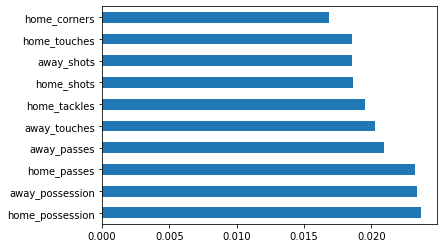

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, ydelnull, test_size=0.2, random_state=42)

# define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model
model.fit(X_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [148]:
feat_importances.nlargest(50).index

Index(['home_possession', 'away_possession', 'home_passes', 'away_passes',
       'away_touches', 'home_tackles', 'home_shots', 'away_shots',
       'home_touches', 'home_corners', 'away_corners', 'away_clearances',
       'home_fouls_conceded', 'away_offsides', 'away_tackles',
       'home_clearances', 'away_fouls_conceded', 'away_shots_on_target',
       'away_yellow_cards', 'home_offsides', 'home_shots_on_target',
       'sg_match_ft', 'goal_home_ft', 'home_yellow_cards', 'goal_away_ft',
       'HDFReactions', 'HGKDiving', 'HGKPotential', 'HDFMarking',
       'HDFComposure', 'HMFVision', 'HMFOverall', 'HMFShortPassing',
       'HDFInterceptions', 'AMFLongPassing', 'HSTPotential', 'AMFFinishing',
       'ADFBalance', 'HMFDribbling', 'AGKOverall', 'ADFPotential',
       'AMFInterceptions', 'HDFShortPassing', 'HDFStamina', 'AMFAggression',
       'AMFComposure', 'AMFVolleys', 'AMFSprintSpeed', 'HMFPositioning',
       'HDFStandingTackle'],
      dtype='object')

In [155]:
X_rdf = X[list(feat_importances.nlargest(30).index)]

X_train, X_test, y_train, y_test = train_test_split(X_rdf, ydelnull, test_size=0.2, random_state=42)

In [156]:
grid_parameters = {'n_neighbors':[3, 5, 7, 11, 15, 21],
                  'metric':['manhattan', 'euclidean'],
                  'weights':['uniform', 'distance']}

grid = GridSearchCV(
        KNeighborsClassifier(),
        grid_parameters,
        verbose = 1,
        refit = True,
)

knn_model = grid.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(knn_model.best_params_, knn_model.best_score_)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))

#print(confusion_matrix(y_test, y_pred))
print("For KNN model:")
print("Train set accuracy = " + str(knn_model.score(X_train, y_train)))
print("Test set accuracy = " + str(knn_model.score(X_test, y_test)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'} 0.41609195402298854

Classification Report

              precision    recall  f1-score   support

    Home Win       0.52      0.50      0.51        48
        Draw       0.17      0.14      0.15        22
    Away Win       0.53      0.49      0.51        39

   micro avg       0.46      0.42      0.44       109
   macro avg       0.41      0.37      0.39       109
weighted avg       0.45      0.42      0.44       109
 samples avg       0.42      0.42      0.42       109

For KNN model:
Train set accuracy = 1.0
Test set accuracy = 0.42201834862385323


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.3s finished
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5],
    'criterion' :['gini', 'entropy']
}

# Train and fit the model: random forest classifier
rforest_clf = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rforest_clf, param_grid=param_grid, cv= 5)
RandomForest = CV_rfc.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)


print(RandomForest.best_params_, RandomForest.best_score_)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(RandomForest.score(X_train, y_train)))
print("Test set accuracy = " + str(RandomForest.score(X_test, y_test)))

KeyboardInterrupt: 

In [45]:
parameters = {
    "learning_rate": [0.01, 0.02, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[10, 20, 50]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
gradboost = clf.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)

print(gradboost.best_params_, gradboost.best_score_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(gradboost.score(X_train, y_train)))
print("Test set accuracy = " + str(gradboost.score(X_test, y_test)))

{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 0.8} 0.6850505221324991
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        61
           1       0.75      0.50      0.60        48

    accuracy                           0.71       109
   macro avg       0.72      0.68      0.68       109
weighted avg       0.72      0.71      0.69       109

[[53  8]
 [24 24]]
For Random Forest model:
Train set accuracy = 0.7310344827586207
Test set accuracy = 0.7064220183486238


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_rdf, ydelnull, test_size=0.2, random_state=42)

In [47]:
grid_parameters = {'n_neighbors':[3, 5, 7, 11, 15, 21],
                  'metric':['manhattan', 'euclidean'],
                  'weights':['uniform', 'distance']}

grid = GridSearchCV(
        KNeighborsClassifier(),
        grid_parameters,
        verbose = 1,
        refit = True,
)

knn_model = grid.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(knn_model.best_params_, knn_model.best_score_)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
print("For KNN model:")
print("Train set accuracy = " + str(knn_model.score(X_train, y_train)))
print("Test set accuracy = " + str(knn_model.score(X_test, y_test)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'} 0.40459770114942534
              precision    recall  f1-score   support

           0       0.54      0.52      0.53        48
           1       0.18      0.14      0.15        22
           2       0.54      0.51      0.53        39

   micro avg       0.48      0.44      0.46       109
   macro avg       0.42      0.39      0.40       109
weighted avg       0.47      0.44      0.45       109
 samples avg       0.44      0.44      0.44       109

For KNN model:
Train set accuracy = 1.0
Test set accuracy = 0.44036697247706424


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.2s finished
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5],
    'criterion' :['gini', 'entropy']
}

# Train and fit the model: random forest classifier
rforest_clf = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rforest_clf, param_grid=param_grid, cv= 5)
RandomForest = CV_rfc.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)


print(RandomForest.best_params_, RandomForest.best_score_)
print(classification_report(y_test, y_pred))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(RandomForest.score(X_train, y_train)))
print("Test set accuracy = " + str(RandomForest.score(X_test, y_test)))

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50} 0.33103448275862074
              precision    recall  f1-score   support

           0       0.68      0.56      0.61        48
           1       1.00      0.09      0.17        22
           2       0.68      0.44      0.53        39

   micro avg       0.69      0.42      0.52       109
   macro avg       0.79      0.36      0.44       109
weighted avg       0.74      0.42      0.49       109
 samples avg       0.42      0.42      0.42       109

For Random Forest model:
Train set accuracy = 0.48735632183908045
Test set accuracy = 0.42201834862385323


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
ydelnull

,is_home_win,is_draw,is_away_win
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
539,1,0,0
540,1,0,0
541,0,0,1
542,1,0,0


In [50]:
parameters = {
    "learning_rate": [0.01, 0.02, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[10, 20, 50]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
gradboost = clf.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)

print(gradboost.best_params_, gradboost.best_score_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(gradboost.score(X_train, y_train)))
print("Test set accuracy = " + str(gradboost.score(X_test, y_test)))

ValueError: y should be a 1d array, got an array of shape (435, 3) instead.

In [63]:
ydelnull.values.tolist()

[[1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0,

In [49]:
hgkn = hgk[['HGKAge', 'HGKOverall', 'HGKPotential', 'HGKDiving', 'HGKPositioning', 'HGKReflexes']]
agkn = agk[['AGKAge', 'AGKOverall', 'AGKPotential', 'AGKDiving', 'AGKPositioning', 'AGKReflexes']]
hdfn = hdf[['HDFStandingTackle', 'HDFSlidingTackle', 'HDFAggression', 'HDFInterceptions', 'HDFMarking', 'HDFOverall', 'HDFPotential', 'HDFReactions']]
adfn = adf[['ADFStandingTackle', 'ADFSlidingTackle', 'ADFAggression', 'ADFInterceptions', 'ADFMarking', 'ADFOverall', 'ADFPotential', 'ADFReactions']]
hmfn = hmf[['HMFOverall', 'HMFPotential', 'HMFShortPassing', 'HMFVolleys', 'HMFBallControl', 'HMFPositioning', 'HMFVision', 'HMFReactions']]
amfn = amf[['AMFOverall', 'AMFPotential', 'AMFShortPassing', 'AMFVolleys', 'AMFBallControl', 'AMFPositioning', 'AMFVision', 'AMFReactions']]
hstn = hst[['HSTAge', 'HSTPotential', 'HSTShortPassing', 'HSTStamina', 'HSTJumping', 'HSTVision', 'HSTMarking',
       'HSTStandingTackle', 'HSTSlidingTackle', 'HSTInterceptions']]
astn = ast[['ASTAge', 'ASTPotential', 'ASTShortPassing', 'ASTStamina', 'ASTJumping', 'ASTVision', 'ASTMarking',
       'ASTStandingTackle', 'ASTSlidingTackle', 'ASTInterceptions']]

X = pd.concat([hstn, hmfn, hdfn, hgkn, astn, amfn, adfn, agkn], axis=1)
X

,HSTAge,HSTPotential,HSTShortPassing,HSTStamina,HSTJumping,HSTVision,HSTMarking,HSTStandingTackle,HSTSlidingTackle,HSTInterceptions,...,ADFMarking,ADFOverall,ADFPotential,ADFReactions,AGKAge,AGKOverall,AGKPotential,AGKDiving,AGKPositioning,AGKReflexes
0,25.33,88.00,77.00,80.67,77.33,77.00,35.33,37.67,33.67,38.33,...,78.8,80.0,83.8,77.8,31.0,84.0,84.0,82.0,80.0,88.0
1,28.00,80.00,68.67,76.33,76.33,68.67,46.00,45.00,36.33,39.33,...,76.6,76.8,79.4,72.2,29.0,78.0,80.0,75.0,76.0,80.0
2,23.67,82.00,72.00,61.67,70.00,68.67,15.67,21.00,17.33,24.00,...,75.2,76.4,79.8,71.8,29.0,76.0,76.0,74.0,74.0,77.0
3,25.33,80.33,70.33,75.00,77.00,64.67,32.67,33.67,25.00,33.67,...,75.2,77.6,78.4,76.2,26.0,80.0,83.0,79.0,80.0,80.0
4,26.33,77.67,67.67,62.67,78.00,67.00,21.00,28.33,23.00,34.67,...,81.6,82.6,85.4,80.8,25.0,85.0,90.0,83.0,84.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,25.33,88.00,77.00,80.67,77.33,77.00,35.33,37.67,33.67,38.33,...,83.8,84.0,85.6,81.8,31.0,88.0,88.0,88.0,83.0,92.0
540,24.00,81.00,70.33,74.00,60.00,71.67,40.00,45.33,34.33,47.33,...,75.8,77.6,80.0,71.6,33.0,81.0,81.0,79.0,80.0,84.0
541,27.67,79.00,69.33,69.67,73.33,68.33,39.67,38.33,30.67,44.33,...,81.6,82.6,85.4,80.8,25.0,85.0,90.0,83.0,84.0,88.0
542,25.00,90.67,81.67,77.67,65.00,83.67,38.33,32.00,27.33,35.67,...,76.6,76.8,79.4,72.2,29.0,78.0,80.0,75.0,76.0,80.0
